In [1]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt

In [142]:
# data = pd.read_csv("/home/maciek/git/DevComPsy_dots_exp/data/staircase_output_1739787194.561567.csv")
data = pd.read_csv("/home/maciek/git/DevComPsy_dots_exp/data/staircase_output_1739793068.124469.csv")
data.head()

,block,trial_number,dots_direction,response_key,response_correct,step,signal_prop
0,0,0,0.0,right,True,0,0.825
1,0,1,180.0,left,True,0,0.825
2,0,2,180.0,right,False,2,0.775
3,0,3,0.0,right,True,1,0.800
4,0,4,0.0,right,True,1,0.800


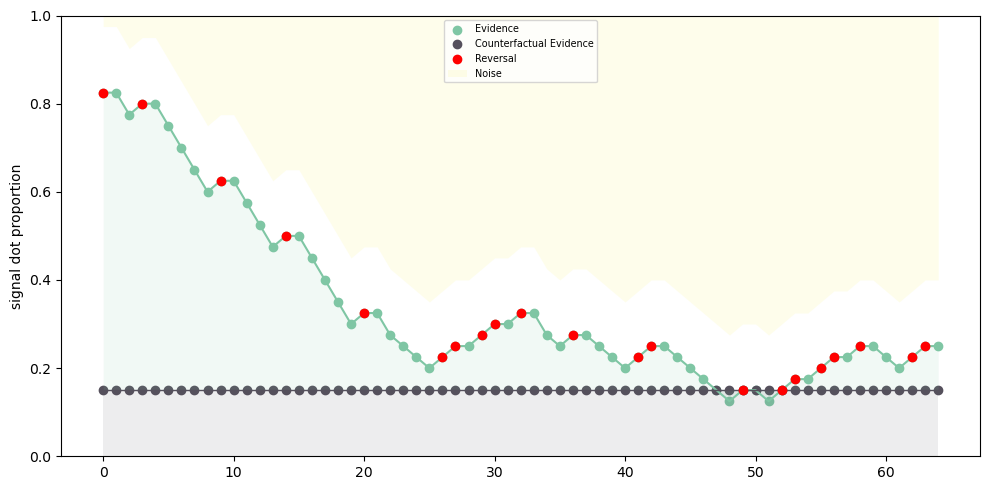

In [143]:
# single staircase

f, ax = plt.subplots(1, 1, figsize=[10, 5])

ax.plot(data.trial_number, data.signal_prop, c="#7FC6A4")
ax.scatter(data.trial_number, data.signal_prop, c="#7FC6A4", label="Evidence")
ax.plot([0, data.trial_number.max()], [0.15, 0.15], lw=1, c="#55505C")
ax.scatter(data.trial_number, np.repeat(0.15, data.trial_number.shape[0]), c="#55505C", label="Counterfactual Evidence")
ax.set_ylabel("trial")
ax.set_ylabel("signal dot proportion")

reversal_bool = np.insert(np.diff(data.step.to_numpy()), 0, -1) == -1
ax.scatter(data.trial_number[reversal_bool], data.signal_prop[reversal_bool], c="red", label="Reversal", zorder=999)

ax.fill_between(data.trial_number, data.signal_prop + 0.15, 1, color="#FAF33E", alpha=0.1, lw=0, label="Noise")
ax.fill_between(data.trial_number, data.signal_prop, 0.15, color="#7FC6A4", alpha=0.1, lw=0)
ax.fill_between(data.trial_number, 0.15, 0, color="#55505C", alpha=0.1, lw=0)

ax.set_ylim(0.0, 1.0)
ax.legend(fontsize="x-small")
plt.tight_layout()

In [140]:
data = pd.read_csv("/home/maciek/git/DevComPsy_dots_exp/data/interleaved_staircase_output_1739806472.563814.csv")
data.head()


,block,trial_number,dots_direction,response_key,response_correct,opposite_strenght,opposite_label,step,signal_prop
0,0,0,0.0,right,True,0.05,low,0,0.925
1,0,1,180.0,left,True,0.15,high,0,0.825
2,0,2,0.0,right,True,0.05,low,0,0.925
3,0,3,0.0,right,True,0.15,high,0,0.825
4,0,4,180.0,left,True,0.05,low,2,0.875


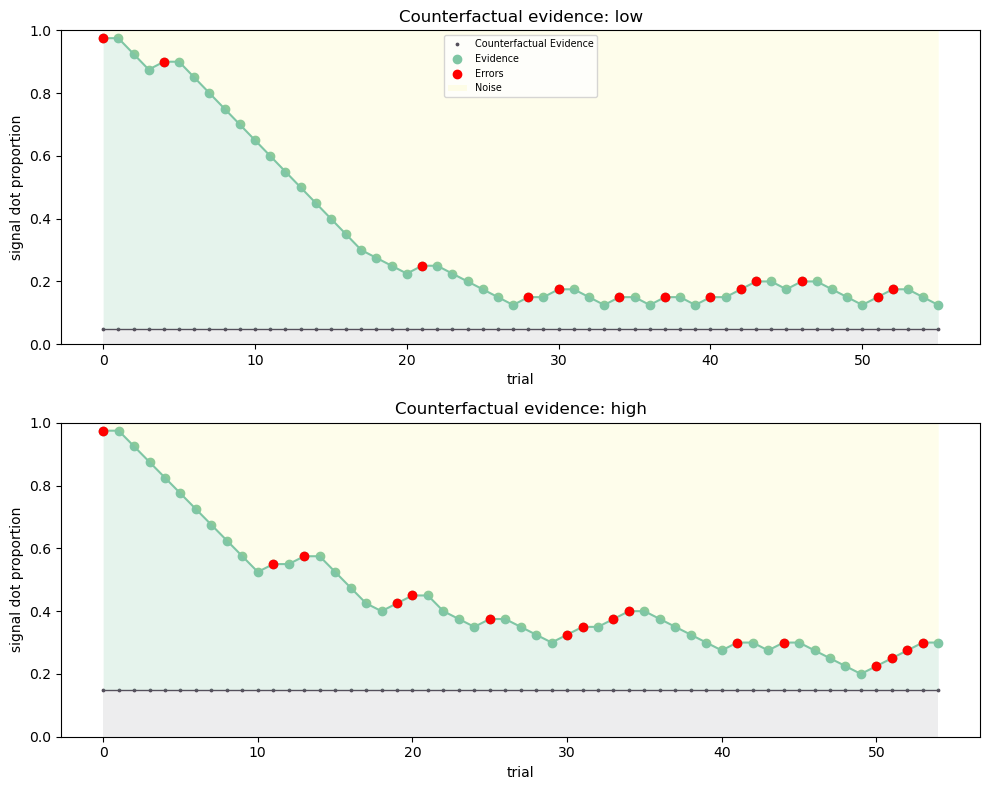

In [141]:
f, ax = plt.subplots(2, 1, figsize=[10, 8])

for ix, trial_type in enumerate(data.opposite_label.unique()):
    data_ = data.loc[data.opposite_label == trial_type].reset_index(drop=True)
    
    cf_value = data_.opposite_strenght.unique()[0]
    ax[ix].set_title(f"Counterfactual evidence: {trial_type}")
    ax[ix].plot([0, data_.index.max()], [cf_value, cf_value], lw=1, c="#55505C")
    ax[ix].scatter(data_.index, np.repeat(cf_value, data_.index.shape[0]), c="#55505C", label="Counterfactual Evidence", s=3)
    ax[ix].fill_between(data_.index, cf_value, 0, color="#55505C", alpha=0.1, lw=0)

    ax[ix].plot(data_.index, data_.signal_prop + cf_value, c="#7FC6A4")
    ax[ix].scatter(data_.index, data_.signal_prop + cf_value, c="#7FC6A4", label="Evidence")

    reversal_bool = np.insert(np.diff(data_.step.to_numpy()), 0, -1) == -1
    ax[ix].scatter(data_.index[reversal_bool], data_.signal_prop[reversal_bool] + cf_value, c="red", label="Errors", zorder=999)

    ax[ix].fill_between(data_.index, data_.signal_prop + cf_value, 1, color="#FAF33E", alpha=0.1, lw=0, label="Noise")
    ax[ix].fill_between(data_.index, data_.signal_prop + cf_value, cf_value, color="#7FC6A4", alpha=0.2, lw=0)
    ax[ix].set_xlabel("trial")
    ax[ix].set_ylabel("signal dot proportion")
    ax[ix].set_ylim(0.0, 1.0)
ax[0].legend(fontsize="x-small")    
plt.tight_layout()

np.float64(0.15)